In [37]:
from IPython.display import Image
#getting all the libraries from qiskit
from qiskit import *

#some qiskit visualization libs
from qiskit.visualization import plot_histogram, circuit_drawer, plot_bloch_multivector, plot_state_city

#the essential libraries
import numpy as np
import time 
import matplotlib.pyplot as plt
import random
import seaborn as sb #just for a better visualization sometimes i might use it.

#for running on a realdevice and linking a ibm id
from qiskit import IBMQ, Aer, execute


In [18]:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-07-21 13:38:03,123: Credentials are already in use. The existing account in the session will be replaced.


In [38]:
available_cloud_backends = provider.backends() 
print('\nHere is the list of cloud backends that are available to you:')
for i in available_cloud_backends: print(i)


Here is the list of cloud backends that are available to you:
ibmq_qasm_simulator
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila
ibm_nairobi
ibm_oslo


# Basic Overview of the Algorithm

![title](Grover_algo.png)

## Grover Operator

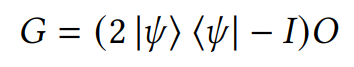

## Grover's Operator action on a arbritary State |a⟩

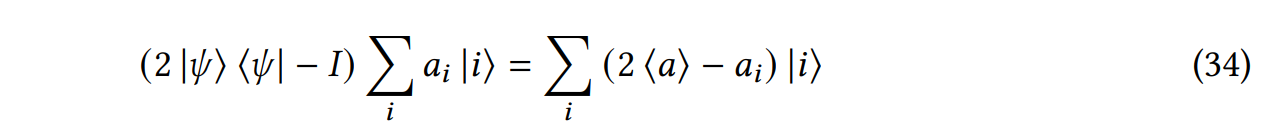

## In order to use the Grover operator to successfully perform a search, the qubit register must be appropriately initialized. The initialization is carried out by applying a Hadamard transform to each of the the main qubits (𝐻⊗𝑛) and applying a Pauli X transform followed by a Hadamard transform (𝐻𝑋) to the ancilla. This leaves the main register in the uniform superposition of all states, |𝜓⟩, and the ancilla in the state |0⟩−|1⟩ √2. After performing these operations, the system is inthe state |𝜓⟩ |0⟩−|1⟩ √2. Using Eq. (34), we can now understand how the Grover operator works. The action of the oracle operator on |x∗⟩|0⟩−|1⟩ √2 reverses the amplitude of that state


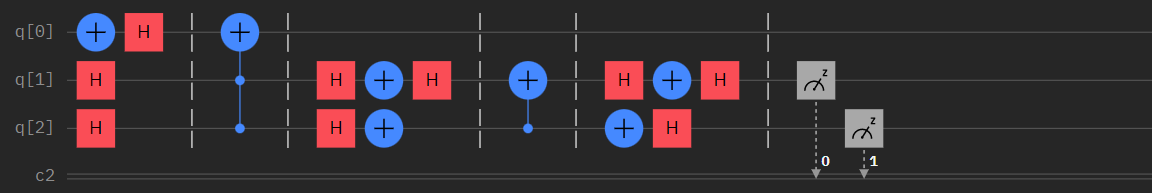

## Final Action of Grover's Algorithm on the state and Understandiny why, when it finds the desired item x* it adds a negative phase to the state |0⟩−|1⟩ √2, Making it - |x*⟩|0⟩−|1⟩ √2 and reverses the amplitude of that state.

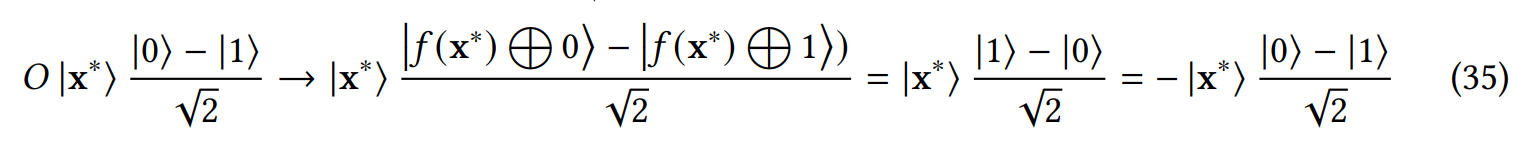

## Step: 1 (Initialization)

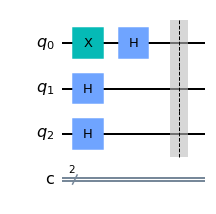

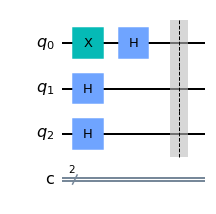

In [75]:
#initialzing the ancillary and main registers 

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.draw('mpl')

## Implmenting the oracle

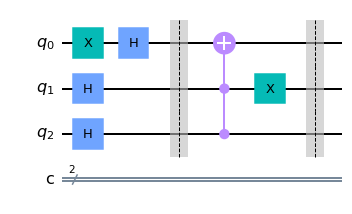

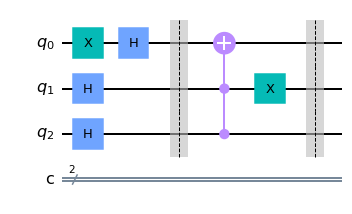

In [76]:
#for x = (1,1)
circuit.toffoli(qreg_q[1], qreg_q[2], qreg_q[0])

#for x = (1,0)
circuit.x(qreg_q[1])

#for x = (0,1)
#circuit.x(qreg_q[2])

#for x = (0,0)
#circuit.x(qreg_q[1])
#circuit.x(qreg_q[2])

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.draw('mpl')

## Implementing the Diffusion operator

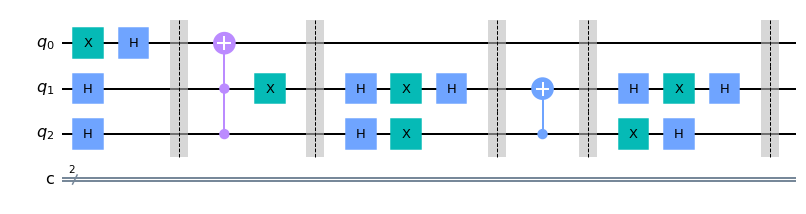

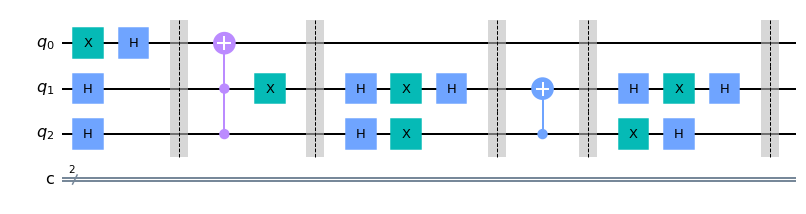

In [77]:
# Diffusion operator (U_s)
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.h(qreg_q[1])

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.cx(qreg_q[2], qreg_q[1])

circuit.barrier(qreg_q[0], qreg_q[1],  qreg_q[2])

circuit.h(qreg_q[1])
circuit.x(qreg_q[2])
circuit.x(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[1])

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.draw('mpl')

In [78]:
circuit.measure(qreg_q[1], creg_c[0])
circuit.measure(qreg_q[2], creg_c[1])


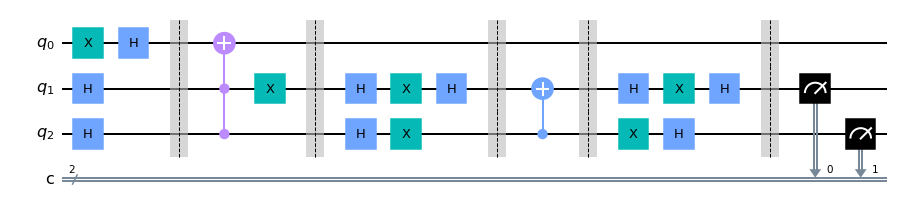

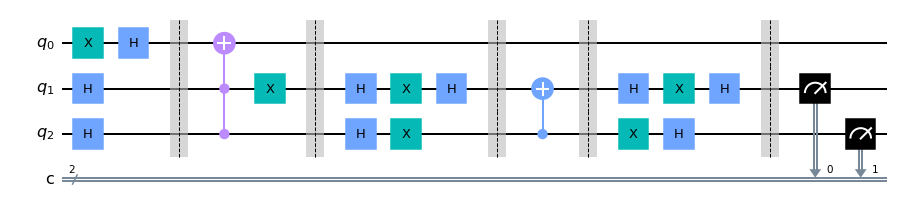

In [79]:
circuit.draw('mpl')

In [80]:
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
qc_sim = circuit.copy()
qc_sim.save_statevector()
qobj = assemble(qc_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()

# from qiskit_textbook.tools import vector2latex
# vector2latex(statevec, pretext="|\\psi\\rangle =")

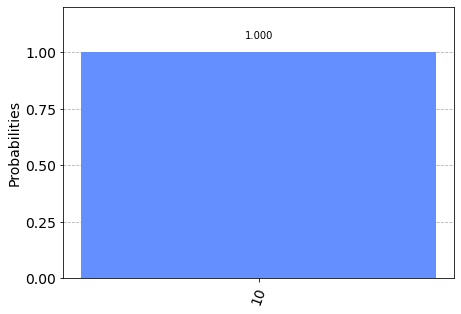

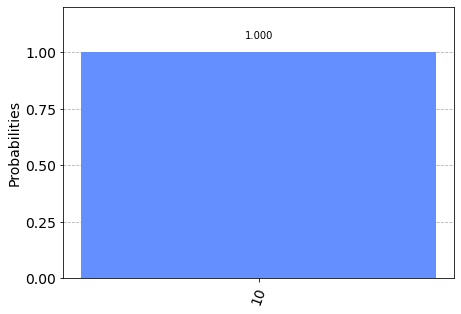

In [81]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(circuit , shots=2048)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [82]:
print(result)

Result(backend_name='aer_simulator', backend_version='0.8.2', qobj_id='84a1e97e-95c9-4ecb-8d8b-cd3f003c11af', job_id='09e4983a-fa84-4fcb-b5ee-79221e914d35', success=True, results=[ExperimentResult(shots=2048, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 2048}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=3, name='circuit-11', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=244414553, metadata={'method': 'statevector', 'device': 'CPU', 'measure_sampling': True, 'parallel_state_update': 8, 'parallel_shots': 1, 'fusion': {'enabled': True, 'threshold': 14, 'max_fused_qubits': 5, 'applied': False}}, time_taken=0.0117893)], date=2022-07-21T14:52:19.005665, status=COMPLETED, metadata={'parallel_experiments': 1, 'omp_enabled': True, 'max_memory_mb': 7967, 'max_gpu_memory_mb': 0, 'mpi_rank': 0, 'num_mpi_processes': 1, 'time_